# keras tuner to find optimal numbers of hidden layer and neurons


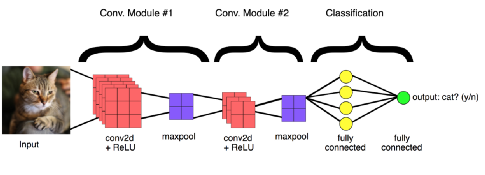

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input



In [2]:
dataset = np.loadtxt("Lesson47-pima-indians-diabetes.data",delimiter=",")

X = dataset[:,:-1]
y = dataset[:,-1]
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [3]:
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(12,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss = "binary_crossentropy",optimizer="adam",metrics=["accuracy"])

model.fit(X,y,epochs = 5)

loss,accuracy = model.evaluate(X,y)

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5430 - loss: 3.7997   
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5742 - loss: 1.8133 
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5859 - loss: 1.3553 
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5951 - loss: 1.2441 
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5964 - loss: 1.1340 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5938 - loss: 1.0719  


In [4]:
tf.__version__

'2.19.1'

# Convolutional Neural Network (CNN) - keras tuner

In [5]:
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()


In [6]:
'''
Label   Description
0   T-shirt/top
1   Trouser
2   Pullover
3   Dress
4   Coat
5   Sandal
6   Shirt
7   Sneaker
8   Bag
9   Ankle boot
'''

'\nLabel   Description\n0   T-shirt/top\n1   Trouser\n2   Pullover\n3   Dress\n4   Coat\n5   Sandal\n6   Shirt\n7   Sneaker\n8   Bag\n9   Ankle boot\n'

2


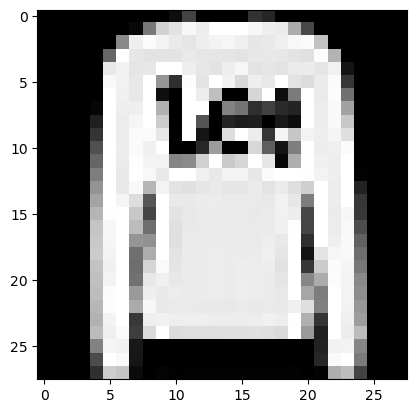

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

print(y_test[1])
plt.imshow(x_test[1],cmap="gray")

9


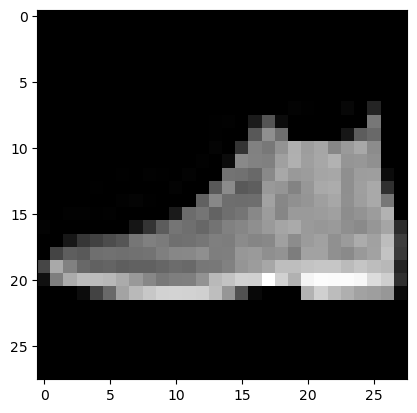

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

print(y_test[0])
plt.imshow(x_test[0],cmap="gray")

In [9]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
x_train.shape[1:]

(28, 28, 1)

In [11]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Flatten, Activation


In [12]:
model = Sequential()

model.add(Input(shape=x_train.shape[1:]))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.fit(x_train,y_train,batch_size=64,epochs=1,validation_data = (x_test,y_test))

938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7677 - loss: 1.0165 - val_accuracy: 0.8109 - val_loss: 0.5364


In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         8,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,736 (206.00 KB)

 Trainable params: 17,578 (68.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,158 (137.34 KB)

In [14]:
import kerastuner
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters 

C:\Users\ziton\AppData\Local\Temp\ipykernel_2928\2400897226.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner


In [15]:
def build_model(hp): #(random search passes this hyperparameter() object) 
    model = Sequential()
    model.add(Conv2D(hp.Int("input_units",min_value=32,max_value=256,step=32),(3,3),input_shape = x_train.shape[1:]))

    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    for i in range(hp.Int("n_layers",1,4)):
        model.add(Conv2D(hp.Int(f"conv_{i}_units",min_value=32,max_value=256,step=32),(3,3)))
        model.add(Activation("relu"))

    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation("softmax"))

    model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    return model
    

In [16]:
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=1,
    executions_per_trial=1,
    directory="Lesson56",
    project_name="tuner_optimise"
)


Reloading Tuner from Lesson56\tuner_optimise\tuner0.json


In [17]:
tuner.search(x=x_train,
             y = y_train,
             verbose=1,
             epochs=1,
             batch_size=64,
             validation_data=(x_test,y_test))

In [18]:
tuner.results_summary()

Results summary
Results in Lesson56\tuner_optimise
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
input_units: 128
n_layers: 2
conv_0_units: 160
conv_1_units: 32
Score: 0.8644000291824341
